#### This time, I'm also working on the Google Job dataset. While this time, I would like to build a simple recommendation system based on the scenario of looking for a position and finding similar openings for users this time

![google](http://img.technews.tw/wp-content/uploads/2015/09/Google-logo_1.jpg)

# Outline

## Recommendation System

- [EDA](#0)   
    * I'll do simple exploratory on the data structure and values
- [Modeling](#1)
    * I'll start to test out vectorize text and find similar positions based on job description
- [Finalizing](#2)
    * Will also consider requirements in this part
    
## [Text Clustering](#Cluster)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv('job_skills.csv')

## [EDA](#0)

**First, I would like to know more about the data**

- Starting from the columns
- Then, the text pattern in columns
- Finally, the correlation between different positions

In [ ]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills."
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational issues with material, process, fixtures, equipment, etc. during the NPI phase to enable delivery of a mature product and manufacturing process into mass production. Support/drive continuous improvement efforts in the supply chain.\nLead suppliers by providing technical direction to establish and validate (utilizing statistical tools) process capability during the NPI phase for consistently delivering a quality product in mass production.\nUtilize DOE’s, FMEA and other Industry standard tools to proactively identify and address risks and optimize process parameters.","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up to 50% of the time"
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to d

In [ ]:
# I modify the column name so that I can use df dot column name more easily
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

In [ ]:
df.Company.value_counts()

Google     1227
YouTube    23  
Name: Company, dtype: int64

In [ ]:
df.Category.value_counts()

Sales & Account Management          168
Marketing & Communications          165
Finance                             115
Technical Solutions                 101
Business Strategy                   98 
People Operations                   86 
User Experience & Design            84 
Program Management                  74 
Partnerships                        60 
Product & Customer Support          50 
Legal & Government Relations        46 
Administrative                      40 
Software Engineering                31 
Sales Operations                    31 
Hardware Engineering                26 
Real Estate & Workplace Services    25 
Manufacturing & Supply Chain        16 
Technical Infrastructure            11 
Network Engineering                 6  
IT & Data Management                5  
Technical Writing                   5  
Developer Relations                 5  
Data Center & Network               2  
Name: Category, dtype: int64

In [ ]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    190
Sunnyvale, CA, United States        155
Dublin, Ireland                     87 
New York, NY, United States         70 
London, United Kingdom              62 
San Francisco, CA, United States    49 
Singapore                           41 
Tokyo, Japan                        31 
Sydney, Australia                   31 
San Bruno, CA, United States        28 
Name: Location, dtype: int64

In [ ]:
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [ ]:
df.Country.value_counts()[:10]

 United States     638
 Ireland           87 
 United Kingdom    62 
 Germany           54 
Singapore          41 
 China             38 
 Australia         35 
 Japan             31 
 Taiwan            30 
 India             28 
Name: Country, dtype: int64

In [ ]:
pd.isnull(df).sum()

Company                     0 
Title                       0 
Category                    0 
Location                    0 
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
Country                     0 
dtype: int64

In [ ]:
df = df.dropna(how='any',axis='rows')

## [Modeling](#1)

In [ ]:
# Perform the necessary imports for similarity
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline


scaler = MaxAbsScaler()

model = NMF(n_components=100)

normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,model,normalizer)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors_Responsibilities = vectorizer.fit_transform(df['Responsibilities'])

In [ ]:
Responsibilities = pipeline.fit_transform(vectors_Responsibilities)

In [ ]:
df_Responsibilities = pd.DataFrame(Responsibilities,index=df['Title'])

In [ ]:
df_Responsibilities.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Title,,,,,,,,,,,,,,,,,,,,,
Google Cloud Program Manager,0.0,0.146072,0.0,0.00000,0.0,0.055745,0.0,0.000000,0.0,0.0,...,0.0,0.216209,0.362576,0.244426,0.0,0.285512,0.0,0.0,0.0,0.0
"Supplier Development Engineer (SDE), Cable/Connector",0.0,0.000000,0.0,0.02447,0.0,0.003750,0.0,0.014894,0.0,0.0,...,0.0,0.000000,0.000000,0.003938,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
pd.set_option('display.max_colwidth', -1)
print(df[df.Title.str.contains('Data Scientist')]['Title'])

277    Customer Experience Data Scientist, Google Cloud Support         
875    Lead Data Scientist                                              
909    Data Scientist / Quantitative Analyst Technical Lead, Engineering
933    Data Scientist / Quantitative Analyst Technical Lead, Engineering
Name: Title, dtype: object


In [ ]:
Position = df_Responsibilities.loc['Customer Experience Data Scientist, Google Cloud Support']

In [ ]:
similarities_1 = df_Responsibilities.dot(Position)

In [ ]:
similarities_1[:3]

Title
Google Cloud Program Manager                                             0.406549
Supplier Development Engineer (SDE), Cable/Connector                     0.004578
Data Analyst, Product and Tools Operations, Google Technical Services    0.062576
dtype: float64

In [ ]:
print(similarities_1.nlargest())

Title
Customer Experience Data Scientist, Google Cloud Support    1.000000
Data Analyst, Trust and Safety                              0.597800
Compensation Analyst                                        0.564735
Marketing Analytics Manager, Retail Marketing               0.564165
Head of Creative, Retail Marketing                          0.563088
dtype: float64


### Let's see if the role is similar and ideal as an alternative.

In [ ]:
df[np.isin(df['Title'],similarities_1.nlargest().index.tolist())].head()

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country
277,Google,"Customer Experience Data Scientist, Google Cloud Support",Program Management,"New York, NY, United States","Create, design and maintain reusable datasets with appropriate architecture to deal with high level of data input complexity.\nProvide analytical decision making support for key projects when it comes to providing customer experience (CX) insights. Research new ways of modeling data proactively to unlock actionable customer insights or improve processes.\nContribute to the development of the analytical frameworks, tools, and skills for the Google Cloud Support team.\nWork with internal teams to translate data and model results into tactical and strategic insights that are clear, complete, accurate and relevant. Be able to provide insights that are understandable and applicable to decision making and meets the needs of varying client audiences; research new algorithms and methods for optimizing quality and support experience improvements.\nPartner with cross-functional Business Intelligence teams, as well as non-technical stakeholders, to help frame problems, document and prioritize data science requirements. Communicate results of complex technical work clearly.","MBA/MS/MA degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\n5 years of quantitative analytics experience with a focus on data analysis, statistical modeling, machine learning, and/or predictive analytics.\nExperience with statistical software (e.g., R, S-Plus, SAS, or similar).\nExperience with databases and scripting languages (e.g., Python).","PhD degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\nProven experience delivering bespoke analytics to senior stakeholders (problem scoping/definition, modeling, interpretation, presentation)\nExperience in a multi-channel client/customer support environment (e.g., email, phone, chat, social).\nAbility to consistently deliver quality outputs in a high paced and dynamic environment, work through ambiguity, with an ability to work to tight deadlines.\nDemonstrated ability to build strong relationships at all levels as a cross-functional influencer.\nStrong oral and written communication skills, including the ability to communicate complex findings in a structured and clear manner to technical and non-technical audiences.",United States
438,Google,"Data Analyst, Trust and Safety",Product & Customer Support,"Sunnyvale, CA, United States","Perform statistical analyses on huge data sets to determine trends and develop business insights in order to protect Google’s users.\nUtilize machine learning to scale, and optimize and automate our abuse fighting efforts.\nAssist with designing and building infrastructure to facilitate analysis and experimentation.\nDevelop metrics for measuring and understanding Google’s effectiveness at combating fraud. Conduct investigations into sophisticated forms of abuse, take action on fraudsters and close attack vectors.\nTranslate business needs into data modeling initiatives and work with engineers to put predictive models into production.","BS degree in Computer Science, Applied Mathematics, Statistics, Quantitative Social Sciences, related field or equivalent practical experience.\n2 years of relevant work experience.\nProgramming experience in one of the following languages: Python, C++ or Java.","MS degree in Computer Science, Applied Mathematics, Statistics, Quantitative Social Sciences or related field.\nExperience with cyber security and malware reducing common and unknown computer risks.\nExperience with machine learning, data mining, or building statistical methods.\nAbility to thrive in a fun, collaborative and fast-paced environment.",United States
700,Google,"Head of Creative, Retail Marketing",Marketing & Communicat

In [ ]:
type(similarities_1)

pandas.core.series.Series

### In my opinion, the role is a good alternative choice while the requirement could be a blocker. So let's also consider the part of requirements.

In [ ]:
vectorizer_Requirements = TfidfVectorizer()
vectors_Requirements = vectorizer_Requirements.fit_transform(df['Minimum_Qualifications'])

In [ ]:
Requirements = pipeline.fit_transform(vectors_Requirements)

In [ ]:
df_Requirementss = pd.DataFrame(Requirements,index=df['Title'])

In [ ]:
Position = df_Requirementss.loc['Customer Experience Data Scientist, Google Cloud Support']

In [ ]:
similarities_2 = df_Responsibilities.dot(Position)

In [ ]:
print(similarities_2.nlargest())

Title
Research Analyst, Market Insights                          0.714274
Research Analyst, Market Insights                          0.714193
Research Analyst, Market Insights                          0.714193
Internal Controls (SOX) Manager, Cloud Business Finance    0.540838
Internal Audit, Technology Auditor                         0.530864
dtype: float64


Though this looks a bit weird, let's see how we put responsibilities and requirements together first.

In [ ]:
similarities_1

Title
Google Cloud Program Manager                                             0.406549
Supplier Development Engineer (SDE), Cable/Connector                     0.004578
Data Analyst, Product and Tools Operations, Google Technical Services    0.062576
Developer Advocate, Partner Engineering                                  0.000148
Program Manager, Audio Visual (AV) Deployments                           0.127973
                                                                           ...   
Global Investigator                                                      0.148027
Campus Security Manager                                                  0.169003
Facilities Manager                                                       0.197810
Physical Security Manager                                                0.004131
Physical Security Manager                                                0.000000
Length: 1235, dtype: float64

In [ ]:
similarities_1.rename("similarity")
similarities_2.rename("similarity")

similarities_1.to_frame().join(similarities_2.to_frame(),lsuffix='1')

,01,0
Title,,
"APAC Accounting Lead, Non-Ads Products",0.087369,0.040733
"APAC Manager, Employment Tax",0.159682,0.110370
"APAC SMB Account Manager, Google Cloud (Mandarin, Cantonese)",0.146706,0.070990
AR and VR Writer,0.067355,0.006549
ASIC Physical Design Engineering Tech Lead & Manager,0.175004,0.151708
...,...,...
"Web Solutions Engineer, Product and Tools Operations",0.089110,0.058621
"Web Solutions Engineer, Product and Tools Operations",0.089110,0.058621
"Web Solutions Engineer, Product and Tools Operations",0.089110,0.058621


In [ ]:
similarities_overall = (2 * similarities_1) + similarities_2

In [ ]:
print(similarities_overall.nlargest())

Title
Customer Experience Data Scientist, Google Cloud Support    2.360018
Research Analyst, Market Insights                           1.682573
Research Analyst, Market Insights                           1.681186
Research Analyst, Market Insights                           1.681186
Marketing Analytics Manager, Retail Marketing               1.621008
dtype: float64


In [ ]:
df[np.isin(df['Title'],similarities_overall.nlargest(3).index.tolist())].head()

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country
277,Google,"Customer Experience Data Scientist, Google Cloud Support",Program Management,"New York, NY, United States","Create, design and maintain reusable datasets with appropriate architecture to deal with high level of data input complexity.\nProvide analytical decision making support for key projects when it comes to providing customer experience (CX) insights. Research new ways of modeling data proactively to unlock actionable customer insights or improve processes.\nContribute to the development of the analytical frameworks, tools, and skills for the Google Cloud Support team.\nWork with internal teams to translate data and model results into tactical and strategic insights that are clear, complete, accurate and relevant. Be able to provide insights that are understandable and applicable to decision making and meets the needs of varying client audiences; research new algorithms and methods for optimizing quality and support experience improvements.\nPartner with cross-functional Business Intelligence teams, as well as non-technical stakeholders, to help frame problems, document and prioritize data science requirements. Communicate results of complex technical work clearly.","MBA/MS/MA degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\n5 years of quantitative analytics experience with a focus on data analysis, statistical modeling, machine learning, and/or predictive analytics.\nExperience with statistical software (e.g., R, S-Plus, SAS, or similar).\nExperience with databases and scripting languages (e.g., Python).","PhD degree with a quantitative focus (economics, computer science, mathematics, physics, engineering, statistics, or accounting)\nProven experience delivering bespoke analytics to senior stakeholders (problem scoping/definition, modeling, interpretation, presentation)\nExperience in a multi-channel client/customer support environment (e.g., email, phone, chat, social).\nAbility to consistently deliver quality outputs in a high paced and dynamic environment, work through ambiguity, with an ability to work to tight deadlines.\nDemonstrated ability to build strong relationships at all levels as a cross-functional influencer.\nStrong oral and written communication skills, including the ability to communicate complex findings in a structured and clear manner to technical and non-technical audiences.",United States
373,Google,"Research Analyst, Market Insights",Sales Operations,"Hamburg, Germany","Design and implement innovative, unique and robust analyses across internal and external data sources to understand consumer behavior, media consumption and advertising effectiveness.\nDistill complex data into simple concepts, combining your technical and analytical skills with a curiosity and passion for storytelling and marketing.\nCollaborate with other analytical and research teams across Google to ensure Market Insights stays abreast of relevant work being done in other parts of the organization.\nWork with appropriate product/technical teams across Google products to push the limits of what’s possible with our current data sets.\nWork with the EMEA Large Advertiser and Agency Marketing (LAAM) team to support their narratives and generate insights for marketing materials and events.","BA/BS degree in Statistics, Applied Mathematics, Econometrics, Engineering, Operation Research, Computer Science or related field or equivalent practical experience.\nExperience in statistical (R, S-Plus, SAS, Python or similar) and database software (SQL or equivalent).\nAnalytical experience in a sales or marketing environment.\nAbility to speak and write in English and French or German fluently and idiomatically.","Master’s degree or PhD in Statistics, Applied Mathematics, Operation Research, Computer Science or related field.\nProject management experi

### The result is not bad! Though one of the alternative position looks more emphasize soft skills part while another is similar in terms of the hard skills part, I think they both look like a good choice as well.

## [Text Clustering](#Clustering)

#### The purpose of this part is aiming at finding the relevant words, skills, requirements across different roles using Cluster Analysis instead of Word Cloud in my previous project.

In [ ]:
from scipy.cluster.vq import kmeans, vq
from numpy import random

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
#from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stop_words_0 = set(stopwords.words('english')) 
stop_words = ['and', 'in', 'of', 'or', 'with','to','on','a']

def remove_noise(text):
    tokens = word_tokenize(text)
    clean_tokens = []
    lemmatizer=WordNetLemmatizer()
    for token in tokens:
        token = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+', '', token)
        token = lemmatizer.lemmatize(token.lower())
        if len(token) > 1 and token not in stop_words_0 and token not in stop_words:
            clean_tokens.append(token)
            
    return clean_tokens

In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100,tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Minimum_Qualifications'])

In [ ]:
random.seed = 123

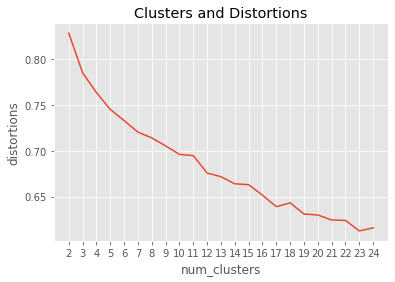

In [ ]:
distortions = []
num_clusters = range(2, 25)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(tfidf_matrix.todense(),i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.title('Clusters and Distortions')
plt.show()

In [ ]:
cluster_centers, distortion = kmeans(tfidf_matrix.todense(),13)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(13):
    # Sort the terms and print top 10 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:5])

['experience', 'data', 'statistic', 'science', 'field']
['experience', 'management', 'project', 'year', 'consulting']
['relevant', 'experience', 'work', 'year', 'equivalent']
['marketing', 'experience', 'year', 'equivalent', 'medium']
['2018', 'june', 'program', 'december', 'united']
['experience', 'babs', 'equivalent', 'practical', 'degree']
['experience', 'sale', 'technology', 'business', 'industry']
['student', 'internship', '2018', 'fulltime', 'program']
['cloud', 'experience', 'computing', 'technical', 'engineering']
['working', 'experience', 'equivalent', 'babs', 'practical']
['design', 'experience', 'interaction', 'related', 'field']
['experience', 'java', 'technical', 'python', 'javascript']
['fluently', 'speak', 'idiomatically', 'write', 'english']


With the groups of words, I can tell different groups are from different fields of the positions.

In [ ]:
import pickle
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(cluster_centers, open('cluster_centers.pkl', 'wb'))